In [1]:
import sys
sys.path.append('/Users/hnamkung/workspace/sketch_home')
from python_lib.pkl_saver import PklSaver

import os
before_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_4/20160121/before'
after_path = '/Users/hnamkung/workspace/sketch_home/sketch_control_plane/SketchMD/result/workload_4/20160121/after'
pcap_dir_list = sorted(os.listdir(before_path))

import statistics


In [2]:
# HLL
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst10"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[3.465449295005052, 1.442133772888703, 1.4933080215172718, 1.25721342230877, 0.20639802362075704, 1.1212909383384795, 1.104702639229895, 1.8626155670442395, 1.9449258617369534, 1.3972732143125373, 1.155350815460404, 1.77844978513449, 0.3846237266568824, 1.1313725209467769, 3.8623809984238, 3.068976332054527, 2.7021141231390007, 2.0901989503234466, 2.0647010895129, 1.0436062150462306]
[3.20054871918544, 2.2899224438488726, 0.18964745923281376, 1.736815745373315, 0.1951098878158291, 1.5082139731142266, 1.348247600473861, 0.9206685811554483, 1.2851327507398198, 1.2560047411269486, 1.1951513433047423, 1.383540444522136, 0.17582266355944018, 2.3216634943738454, 3.6446170314024284, 2.0993960010041035, 2.371015429663361, 1.5175076311980842, 2.5108914055698075, 1.4998165137614679]
20 1.4677208972029874
20 1.504015243437847


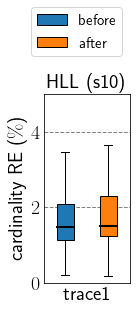

In [3]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("HLL (s10)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("hll.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [4]:
# PCSA
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    # print(pcap_dir)
    for inst_name in ["inst5", "inst9"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.8046993878056549, 1.7520254011646945, 1.566864877151048, 1.6820374243824927, 0.9226893848265711, 0.47857404468318887, 0.5186806062079585, 1.3560564651736784, 0.34803848896230877, 1.207268292328801, 0.45885659084921404, 0.6598684028849944, 0.3833118737882757, 0.8807869962272135, 0.7610225402664323, 1.7211066092839682, 2.1701940466298453, 0.582945999674569, 0.8263670986131405, 0.9417741929537151, 1.2213106241561948, 1.8382690988308354, 1.4122491590302748, 2.2746165264720437, 1.004556662049017, 1.3618649371337543, 2.2966974496526893, 2.03295996959433, 2.583110912368469, 1.1078524921418949, 2.0155594442453246, 2.641395164878628, 3.6198746454707798, 1.8590218470011042, 0.08565622693432719, 2.2935361140666632, 1.281725888324873, 1.4535550670900035, 1.135098716972289, 1.7657688844913306]
[1.7413899536299298, 0.914302844081388, 1.4060702800403746, 1.8294443123306277, 0.8521436965157272, 0.6622046895084438, 1.9718621912041652, 0.8106904476528738, 0.9596722790784282, 0.07688517982174581, 1.11

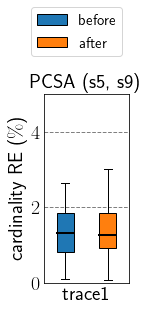

In [5]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("PCSA (s5, s9)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 5])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("pcsa.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [6]:
# Entropy
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst6", "inst7"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[10.06929640123006, 11.297478437936165, 28.821263232674426, 28.597580806728036, 12.367780960318612, 11.897150980744033, 27.56920846370606, 27.870471180756006, 11.989353560645135, 12.228683175907546, 27.94582313883592, 27.625192923126413, 11.956657054450789, 11.195800261590204, 28.29090907150991, 28.936407233215373, 10.711678209555927, 10.833661630690791, 28.883179797549573, 28.23906712337216, 11.428753000942594, 10.912482122399279, 27.585044359659918, 27.92832889634011, 10.266253452360148, 10.53532796251941, 27.753922298872137, 27.760450407135817, 10.179606531799998, 10.39698463945292, 28.368865798907027, 27.967662343691963, 10.217831402929713, 11.065860924375816, 28.050284482126344, 27.25481866355955, 10.652103565631627, 10.899483796519299, 27.62317306644905, 27.29825929507299]
[10.146643694739298, 11.367011211846334, 21.098906033408287, 20.738448505994107, 12.565648062887092, 12.16887759372041, 19.505082817570703, 19.768654516501925, 12.075952963105115, 12.275447175747892, 20.1039198

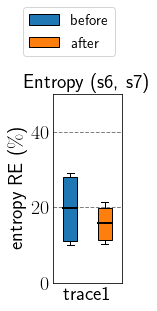

In [7]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("Entropy (s6, s7)", fontsize = 20)
plt.ylabel("entropy RE ($\%$)", fontsize = 20)
plt.ylim([0, 50])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("entropy.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [8]:
# MRAC
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst1"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)
print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.38760045924355563, 0.4341662895328572, 0.3682711369872861, 0.3839411831049058, 0.5126545936387156, 0.371633754812258, 0.4072396676204274, 0.5460584365860673, 0.5480582265999959, 0.5114959068230704, 0.4291308449153569, 0.406874917030828, 0.4000244879386844, 0.38797578197945504, 0.5151809103464431, 0.38271036519237867, 0.40850282129545545, 0.35830731857201814, 0.4966610369569893, 0.5296795218010677, 0.37909496170338136, 0.3790362459641577, 0.3790797671891955, 0.38708807624279457, 0.36009526240938733, 0.5522123657852389, 0.47397504503508875, 0.52034787897196, 0.5626217675598321, 0.5041955336852519]
[0.4042919770575018, 0.5263723189345957, 0.5004867483392805, 0.588272345844411, 0.4413204144477579, 0.5090448273451675, 0.5427823627638383, 0.5311094851363308, 0.5522176534320753, 0.5271381708100163, 0.420741426792193, 0.5096547692513119, 0.40048598993268425, 0.4165737762909213, 0.513128076377572, 0.4201179275834627, 0.5407179452646732, 0.5315485746504955, 0.4822253395943319, 0.5477134437314

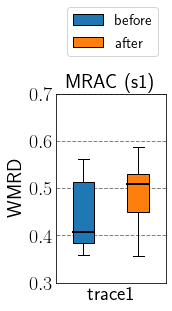

In [9]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

plt.title("MRAC (s1)", fontsize = 20)
plt.ylabel("WMRD", fontsize = 20)
plt.ylim([0.3, 0.7])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(0.5))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrac.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [10]:
# MRB
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst2"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

before_list = before_list[5:10]
after_list = after_list[5:10]

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[0.2548171610728716, 2.7266020452076973, 2.1455804756546533, 0.4477703490155186, 0.524326301670528, 1.9688084352329578, 0.2162096627533391, 2.7154904300121343, 2.0631837640716664, 2.017788537445398, 1.1710161076897057, 1.3683366483041581, 2.746599611384158, 1.2288307394816456, 0.9324952286117334, 2.2983786165663522, 1.6907536907536906, 3.842372416316078, 1.0227839680691835, 1.4091724314629772]
[0.21970277944742678, 0.6357169113672239, 0.4774511800511393, 0.7086354647330256, 0.6498060896113541, 0.43668122270742354, 1.3707955565182413, 1.5016333743908317, 1.2432772228818887, 2.2695273214884346, 1.258690232482721, 2.763105770500462, 0.759145817827904, 0.7763351626288315, 0.9028890327098341, 0.12930113272066682, 1.210033191882694, 1.605203149747818, 1.6651079794038288, 1.8805781079057984]
5 2.017788537445398
5 1.3707955565182413


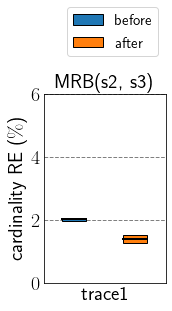

In [11]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("MRB(s2, s3)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("mrb.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [12]:
# CountSketch
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "data.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "data.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)

print(len(before_list), statistics.median(before_list))
print(len(after_list), statistics.median(after_list))


[1.4972787757698163, 1.1362233879267079, 1.3152697694922657, 1.897330030817266, 1.321001695040504, 1.280056449924289, 2.215503950054271, 1.6377442843037247, 2.091456970213851, 1.2435799922586035, 1.6541955129627564, 1.8326754430127032, 1.907444325615274, 2.387755590121124, 1.9459026738245988, 1.857543780902752, 1.4271324673250154, 2.8466793027915607, 2.0403686550335256, 3.427781701138181]
[1.604185009835206, 1.2277770918950863, 1.3395554019873541, 1.7611153730196096, 1.3180998483179136, 1.2588187076954949, 2.209795774999977, 1.6613652497413105, 1.7735205418393682, 1.3134006730662302, 1.600450071597453, 1.9778898039893935, 1.9172655632678606, 2.169111784938336, 1.9321251737859555, 1.8562343138745911, 1.4186851423287044, 2.805361197060792, 2.0541154474541847, 3.030761931579274]
20 1.8451096119577275
20 1.7673179574294888


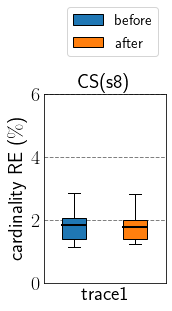

In [13]:
import matplotlib.pyplot as plt
import math
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

data = [before_list, after_list]

values = []

position = 0
positions = []
labels = []
colors = []

for i, v in enumerate(data):
    labels.append("%d.txt" % (i+1))
    values.append(v)
    colors.append('C'+str(int(i)))
    positions.append(position)
    position += 1


plt.figure(figsize=(2.5, 5))

box_plot_data = values
box = plt.boxplot(box_plot_data, patch_artist=True, labels=labels, widths=0.4, positions=positions, showfliers=False)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set(color='black', linewidth=2)

plt.tick_params(labelsize=20)

# plt.axis('off')

ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.axvline(x=1.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=3.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=5.5, color='black', linestyle="-", linewidth=1)
# ax.axvline(x=7.5, color='black', linestyle="-", linewidth=1)

# plt.title("CM(inst6) CS(inst7), Kary(inst8)", fontsize = 20)
plt.title("CS(s8)", fontsize = 20)
plt.ylabel("cardinality RE ($\%$)", fontsize = 20)
plt.ylim([0, 6])
# from matplotlib.ticker import MultipleLocator
# ax.yaxis.set_major_locator(MultipleLocator(2))
plt.legend([box['boxes'][0], box['boxes'][1]], ['before', 'after'], loc=1, bbox_to_anchor=(1,1.5), fontsize=15)
plt.xticks([0.5], ["trace1"])


plt.grid(color='gray', linestyle='--', linewidth=1)
ax.xaxis.grid(False)
plt.tight_layout()
plt.savefig("cs.png", bbox_inches='tight', pad_inches=0.2)
plt.show()
plt.close()


In [27]:
before_list = []
after_list = []

for pcap_dir in pcap_dir_list:
    for inst_name in ["inst8"]:
        before_pkl_path = os.path.join(before_path, pcap_dir, inst_name)
        saver = PklSaver(before_pkl_path, "hf.pkl")
        before_list += saver.load()

        after_pkl_path = os.path.join(after_path, pcap_dir, inst_name)
        saver = PklSaver(after_pkl_path, "hf.pkl")
        after_list += saver.load()

print(before_list)
print(after_list)



[(50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (49, 1), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0)]
[(50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (50, 0), (49, 1), (50, 0), (50, 0)]
